In [0]:
# import pandas as pd
# url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

# df = pd.read_csv(url)
# countries = list(set(df[df.columns[1]]))
# print(countries)

['Egypt', 'Philippines', 'Senegal', 'Montenegro', 'Slovenia', 'Bolivia', 'Hungary', 'Andorra', 'Kazakhstan', 'Mali', 'Guyana', 'Switzerland', 'Serbia', 'Romania', 'Jordan', 'Guatemala', 'Congo (Kinshasa)', 'Lebanon', 'Italy', 'Tanzania', 'Israel', 'Dominica', 'Liechtenstein', 'Togo', 'China', 'Libya', 'Mexico', 'India', 'Belgium', 'Morocco', 'Slovakia', 'Paraguay', 'Antigua and Barbuda', 'Sao Tome and Principe', 'Greece', 'Brazil', 'Iran', 'Chile', 'MS Zaandam', 'Costa Rica', 'Liberia', 'Honduras', 'Indonesia', 'United Kingdom', 'Saint Kitts and Nevis', 'Haiti', 'Japan', 'Kyrgyzstan', 'Latvia', 'Angola', 'Panama', 'Oman', 'Congo (Brazzaville)', 'Denmark', 'Saint Vincent and the Grenadines', 'Gabon', 'Cuba', 'Laos', 'Papua New Guinea', 'Maldives', 'Nepal', 'Tunisia', 'Djibouti', 'France', 'Benin', 'Syria', 'Zambia', 'Canada', 'Moldova', 'Malta', 'Estonia', 'Zimbabwe', 'West Bank and Gaza', 'Iraq', 'Turkey', 'Grenada', 'Guinea-Bissau', 'Colombia', 'Lithuania', 'Namibia', 'Nigeria', 'Ukra

**Choosing Countries** <br>
A total of 25 countires have been choosen. 


*   The first 10 countries are those with high new cases and the include Mexico, Brazil, Ukraine, India, USA, Panama, Hungary, Pakistan, Israel, Bulgaria. (Source : https://www.worldometers.info/coronavirus , retrieved on : April 24, 2020, information last updated on: retrieved on : April 24, 2020).

*  Next 10 countries are those with lowest new cases and they include Spain, Italy, France, Germany, UK, Turkey, Iran, Russia, Belgium, Canada.  (Source : https://www.worldometers.info/coronavirus , retrieved on : April 24, 2020, information last updated on retrieved on : April 24, 2020). 

*  Last 5 countries are those with GDP growth similar to Pakistan's. The include Korea, Australia, Norway, Nigeria, United Arab Emirates. (Source : http://statisticstimes.com/economy/projected-world-gdp-ranking.php , retrieved on : April 24, 2020, information last on 20 Feb 2020).
 



In [0]:
countries = ["Mexico", "Brazil", "Ukraine", "India", "USA", "Panama", "Hungary", "Pakistan", "Israel", "Bulgaria",
             "Spain", "Italy", "France", "Germany", "UK", "Turkey", "Iran", "Russia", "Belgium", "Canada",
             " Korea", "Australia", "Norway", "Nigeria", "United Arab Emirates"]

In [0]:
from datetime import datetime, timedelta

date =  datetime.strptime('2020-01-22','%Y-%m-%d')
today_date = datetime.today()
diff = (today_date - date).days
count= 1

while(count!= diff):
  i_date = (date + timedelta(days=count)).strftime('%Y-%m-%d')
  count+=1
  print(i_date)

- variables including in from the api are  ["country","confirmed","deaths","recovered","confirmed_diff","deaths_diff","recovered_diff","active","active_diff","fatality_rate"]

- only including the cases are being available in the dataset.
- in place of date will input number of days since first case would be my variable.

In [0]:
import requests
import csv
import os.path
from datetime import datetime, timedelta

url = "https://covid-19-statistics.p.rapidapi.com/reports"
variables = ["country","date","confirmed","deaths","recovered","confirmed_diff","deaths_diff","recovered_diff","active","active_diff","fatality_rate"]

date =  datetime.strptime('2020-01-22','%Y-%m-%d')
today_date = datetime.today()
diff = (today_date - date).days
count= 0

with open("corona_global.csv", 'w', newline='') as file:
  writer = csv.writer(file)
  writer.writerow(variables)

  while(count!= diff):
    count+=1
    print(count)
    i_date = (date + timedelta(days=count)).strftime('%Y-%m-%d')
    for i in range(len(countries)):

      querystring = {"region_name":countries[i],"date":i_date}

      headers = {
          'x-rapidapi-host': "covid-19-statistics.p.rapidapi.com",
          'x-rapidapi-key': "5139f761cdmsh9dae448cf77f2fcp159a89jsn323fea496f96"
          }
      response = requests.request("GET", url, headers=headers, params=querystring)

      data = response.text
      if len(data) > 18:
        data = " ".join(data.split())[15:len(data)-9].split(' ')
        b = [countries[i],data[1][:len(data[1])-1],data[3][:len(data[3])-1],data[5][:len(data[5])-1],data[7][:len(data[7])-1],data[9][:len(data[9])-1],data[11][:len(data[11])-1],data[13][:len(data[13])-1],data[18][:len(data[18])-1],data[20][:len(data[20])-1],data[22][:len(data[22])-1]]
        writer.writerow(b)
      

    

In [0]:
url = "https://covid-19-statistics.p.rapidapi.com/reports"
querystring = {"region_name":"United Arab Emirates","date":"2020-04-20"}

headers = {
    'x-rapidapi-host': "covid-19-statistics.p.rapidapi.com",
    'x-rapidapi-key': "5139f761cdmsh9dae448cf77f2fcp159a89jsn323fea496f96"
    }
response = requests.request("GET", url, headers=headers, params=querystring)

print(response.text)


{
    "data": [
        {
            "date": "2020-04-20",
            "confirmed": 7265,
            "deaths": 43,
            "recovered": 1360,
            "confirmed_diff": 484,
            "deaths_diff": 2,
            "recovered_diff": 74,
            "last_update": "2020-04-20 23:36:27",
            "active": 5862,
            "active_diff": 408,
            "fatality_rate": 0.0059,
            "region": {
                "iso": "ARE",
                "name": "United Arab Emirates",
                "province": "",
                "lat": "23.4241",
                "long": "53.8478",
                "cities": []
            }
        }
    ]
}


In [0]:
#b = [a[a.index('date":')+1][1:len(a[a.index('date":')+1])-2], a[a.index('"confirmed":')+1]]
b = [a[1][:len(a[1])-1],a[3][:len(a[3])-1],a[5][:len(a[5])-1],a[7][:len(a[7])-1],a[9][:len(a[9])-1],a[11][:len(a[11])-1],a[13][:len(a[13])-1],a[18][:len(a[18])-1],a[20][:len(a[20])-1],a[22][:len(a[22])-1]]
print(b)
variables = ["country","confirmed","deaths","recovered","confirmed_diff","deaths_diff","recovered_diff","active","active_diff","fatality_rate"]
print(len(b),len(variables))

['"2020-04-22"', '10076', '212', '2156', '511', '11', '83', '7708', '417', '0.021']
10 10


In [0]:
gdp_data =  !wget -O gdp.csv 'http://databank.worldbank.org/data/download/GDP.csv'

In [0]:
import requests
import pandas as pd

countries_diff_format = ["Mexico", "Brazil", "Ukraine", "India", "United States", "Panama", "Hungary", "Pakistan", "Israel", "Bulgaria",
             "Spain", "Italy", "France", "Germany", "UK", "Turkey", "Iran", "Russia", "Belgium", "Canada",
             "Korea", "Australia", "Norway", "Nigeria", "United Arab Emirates"]

gdpf = pd.read_csv('http://databank.worldbank.org/data/download/GDP.csv')


gdpf = gdpf.loc[:,gdpf.columns[[3,4]]]
gdpf.columns = ["Country",  "GDP"]
gdpf = gdpf.loc[gdpf['Country'].isin(countries_diff_format)]

print(gdpf)
gdpf.to_csv('gdp.csv')


                 Country           GDP
4          United States   20,544,343 
7                Germany    3,947,620 
9                 France    2,777,535 
10                 India    2,718,732 
11                 Italy    2,083,864 
12                Brazil    1,868,626 
13                Canada    1,713,342 
16             Australia    1,433,904 
17                 Spain    1,419,042 
18                Mexico    1,220,699 
22                Turkey      771,350 
26               Belgium      542,761 
31                Norway      434,167 
32  United Arab Emirates      414,179 
33               Nigeria      397,270 
35                Israel      370,588 
43              Pakistan      314,588 
59               Hungary      157,883 
61               Ukraine      130,832 
77              Bulgaria       65,133 
78                Panama       65,055 


# From this cell

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##Loading Data

In [0]:
countries_diff_format = ["Mexico", "Brazil", "Ukraine", "India", "United States", "Panama", "Hungary", "Pakistan", "Israel", "Bulgaria",
             "Spain", "Italy", "France", "Germany", "UK", "Turkey", "Iran", "Russia", "Belgium", "Canada",
             "Korea", "Australia", "Norway", "Nigeria", "United Arab Emirates"]
data = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv',parse_dates=['date'])
data = data.drop('new_cases', 1)
data = data.drop('total_deaths', 1)
data = data.drop('new_deaths', 1)
data = data.drop('total_cases_per_million', 1)
data = data.drop('new_cases_per_million', 1)
data = data.drop('total_deaths_per_million', 1)
data = data.drop('new_deaths_per_million', 1)
data = data.drop('iso_code', 1)
data = data.drop('total_tests',1)
data = data.drop('new_tests',1)
data = data.drop('new_tests_smoothed',1)
data = data.drop('total_tests_per_thousand',1)
data = data.drop('new_tests_per_thousand',1)
data = data.drop('new_tests_smoothed_per_thousand',1)
data = data.drop('tests_units',1)
data = data.loc[data['location'].isin(countries_diff_format)]
#data = data.fillna(0)
data =data.dropna()

#data['date'] =pd.to_datetime(data.date)
data = data.sort_values(by='date',ascending=True)

data['row_number'] = np.arange(len(data))


In [0]:
countries_diff_format = ["Mexico", "Brazil", "Ukraine", "India", "United States", "Panama", "Hungary", "Pakistan", "Israel", "Bulgaria",
             "Spain", "Italy", "France", "Germany", "UK", "Turkey", "Iran", "Russia", "Belgium", "Canada",
             "Korea", "Australia", "Norway", "Nigeria", "United Arab Emirates",]
             
covid_data = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv',parse_dates=['date'])

#covid_data = covid_data.loc[covid_data['location'].isin(countries_diff_format)]

#Sorting data by dates (Times series)
data = data.sort_values(by='date',ascending=True)

In [49]:
covid_data.dtypes

iso_code                                   object
location                                   object
date                               datetime64[ns]
total_cases                                 int64
new_cases                                   int64
total_deaths                                int64
new_deaths                                  int64
total_cases_per_million                   float64
new_cases_per_million                     float64
total_deaths_per_million                  float64
new_deaths_per_million                    float64
total_tests                               float64
new_tests                                 float64
total_tests_per_thousand                  float64
new_tests_per_thousand                    float64
new_tests_smoothed                        float64
new_tests_smoothed_per_thousand           float64
tests_units                                object
stringency_index                          float64
population                                float64


## Dealing with NaN data

In [5]:
covid_data.isnull().sum()

iso_code                              64
location                               0
date                                   0
total_cases                            0
new_cases                              0
total_deaths                           0
new_deaths                             0
total_cases_per_million              385
new_cases_per_million                385
total_deaths_per_million             385
new_deaths_per_million               385
total_tests                        15853
new_tests                          16478
total_tests_per_thousand           15853
new_tests_per_thousand             16478
new_tests_smoothed                 15251
new_tests_smoothed_per_thousand    15251
tests_units                        14653
stringency_index                    4541
population                            64
population_density                   970
median_age                          1983
aged_65_older                       2250
aged_70_older                       2082
gdp_per_capita  

In [0]:
# dropping the NaN data
covid_data = covid_data.fillna(0)

## Selecting Data

In [85]:
data = covid_data.copy()

#Dropping location now only
data = data.drop('location',1)
data = data.drop('iso_code',1)

## dropping columns with double information for eg total cases and total cases_per_million tell the same information
data = data.drop('new_cases', 1)
data = data.drop('new_deaths', 1)
data = data.drop('total_cases_per_million', 1)
data = data.drop('new_cases_per_million', 1)
data = data.drop('total_deaths_per_million', 1)
data = data.drop('new_deaths_per_million', 1)
data = data.drop('new_tests',1)
data = data.drop('new_tests_smoothed',1)
data = data.drop('total_tests_per_thousand',1)
data = data.drop('new_tests_per_thousand',1)
data = data.drop('new_tests_smoothed_per_thousand',1)
data = data.drop('tests_units',1)
data = data.drop('aged_70_older',1)

print(data.shape)
data.head()

(21606, 17)


,date,total_cases,total_deaths,total_tests,stringency_index,population,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
0,2020-03-13,2,0,0.0,0.00,106766.0,584.8,41.2,13.085,35973.781,0.0,0.0,11.62,0.0,0.0,0.0,0.0
1,2020-03-20,4,0,0.0,30.56,106766.0,584.8,41.2,13.085,35973.781,0.0,0.0,11.62,0.0,0.0,0.0,0.0
2,2020-03-24,12,0,0.0,41.67,106766.0,584.8,41.2,13.085,35973.781,0.0,0.0,11.62,0.0,0.0,0.0,0.0
3,2020-03-25,17,0,0.0,41.67,106766.0,584.8,41.2,13.085,35973.781,0.0,0.0,11.62,0.0,0.0,0.0,0.0
4,2020-03-26,19,0,0.0,41.67,106766.0,584.8,41.2,13.085,35973.781,0.0,0.0,11.62,0.0,0.0,0.0,0.0


### Pearson’s Correlation Coefficient Matrix


In [86]:
data[data.columns[1:]].corr()['total_cases'][:]

total_cases               1.000000
total_deaths              0.989906
total_tests               0.174200
stringency_index         -0.032312
population                0.565042
population_density       -0.016188
median_age                0.041935
aged_65_older             0.040614
gdp_per_capita            0.027409
extreme_poverty          -0.002165
cvd_death_rate           -0.012191
diabetes_prevalence       0.022798
female_smokers            0.032292
male_smokers              0.043782
handwashing_facilities    0.032149
hospital_beds_per_100k    0.015369
Name: total_cases, dtype: float64

<Figure size 432x288 with 0 Axes>

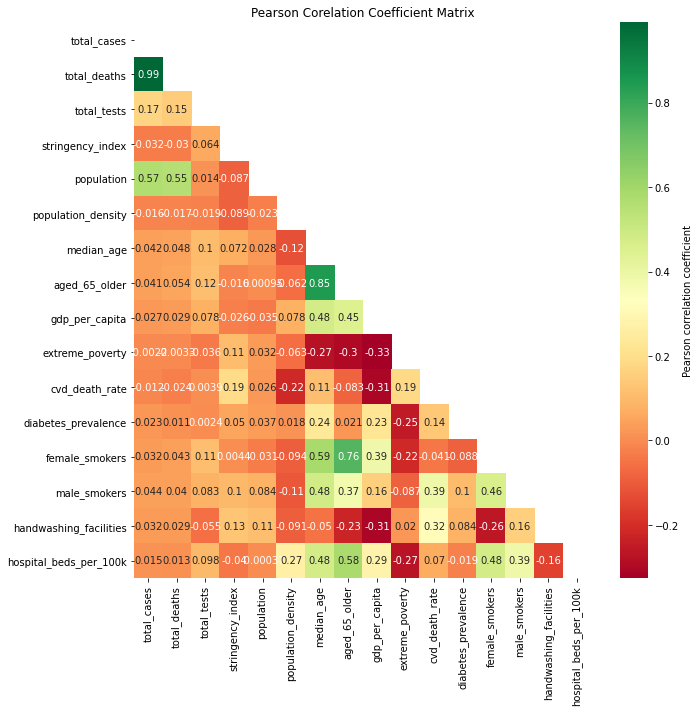

In [87]:
plt.clf()

corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(10,10))

fig = sns.heatmap(corr, mask=mask, square=False, cmap='RdYlGn', annot=True, ax=ax, 
            cbar_kws={'label':'Pearson correlation coefficient'})

fig.set_title('Pearson Corelation Coefficient Matrix')
fig.tick_params(axis='x', rotation=90)
fig.tick_params(axis='y', rotation=0)

fig = fig.get_figure()
fig.tight_layout()
fig.show()

Dropping columns with |P| > 0.1

In [0]:
data = data.drop(['population','total_tests','total_deaths'],1)

## Making data categorcial for location and data

In [0]:
#adding location again
data['location'] = covid_data['location']

#changing data to categorical data by converting it to number of days. Since there is data for everyday just assigning a number to every date.
data['number_of_days'] = np.arange(len(data))

#changing location to categorical by having a column for every country

for i in countries_diff_format:
  data[i] = 0

for i in countries_diff_format:
  data.loc[data['location'] == i, i] = 1

data = data.drop('location',axis = 1)

#having an index number to later extract info of a particular country
#data['row_number'] = np.arange(len(data))

In [0]:
df = data.copy()
df = df.drop('date',axis = 1)

#df.set_index(['row_number'])
df = df.fillna(0)

In [0]:
pak_cases = data[data['Pakistan'] == 1] 

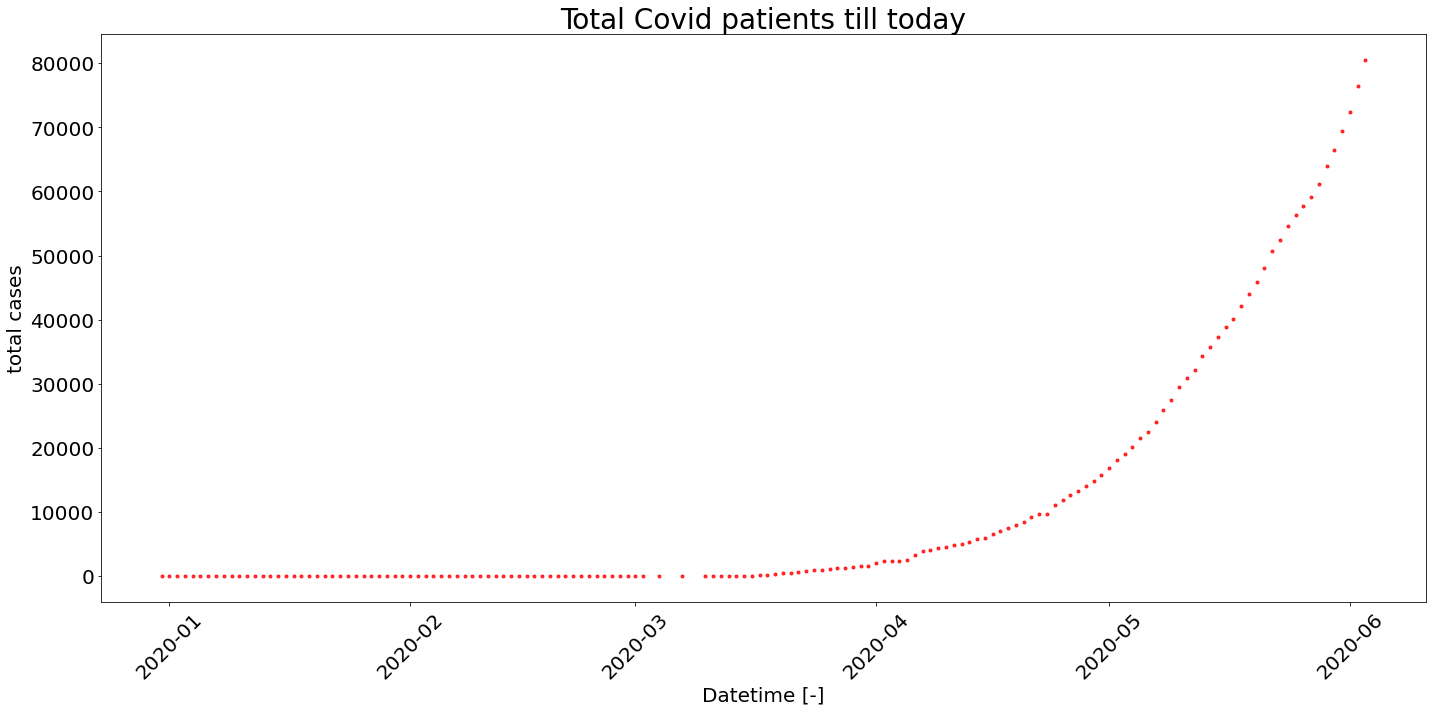

In [74]:
# Plotting the target: Total cases

plt.figure(figsize=(20,10))

plt.plot(pak_cases["date"], pak_cases['total_cases'], '.', color='red', label='Original data', alpha=0.8)
plt.xlabel('Datetime [-]', fontsize=20)
plt.ylabel(r'total cases', fontsize=20)

plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)

plt.title('Total Covid patients till today', fontsize=28)

plt.tight_layout()

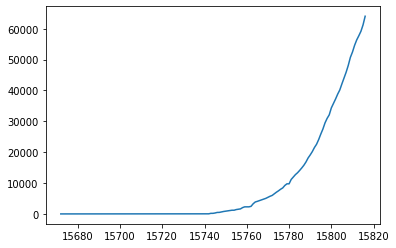

In [9]:
plt.plot(pak_cases['total_cases'])
plt.show()

##Splitting into training and tests data

In [0]:
y = df['total_cases']

X = df.drop(['total_cases'], axis=1)

train_size = 0.7

split_index = int(df.shape[0]*train_size) #index at which the datafram will be split

X_train = X[:split_index]
y_train = y[:split_index]

X_test = X[split_index:]
y_test = y[split_index:]

In [31]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.recurrent import LSTM
from keras.layers import Dense, Conv1D, MaxPool2D, Flatten, Dropout
from keras.optimizers import Adam
from time import time
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


In [92]:
scalerX = StandardScaler(with_mean=True, with_std=True).fit(X_train)

X_train = scalerX.transform(X_train)
X_test = scalerX.transform(X_test)

print((X_train.shape, y_train.shape))
print((X_test.shape, y_test.shape))

((15124, 38), (15124,))
((6482, 38), (6482,))


## Linear Regression

In [93]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

-0.019611616634552576

In [94]:
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))

155876169111.19427


In [0]:
X_test = X[split_index:]
pak_indices_dates = []

pak_indices = list(X_test[X_test['Pakistan']==1].index)

for i in pak_indices:
    pak_indices_dates.append(data.date.loc[[i]].values[0])


In [96]:
X_test_1 = X[split_index:]
X_test_1["test_number"] = np.arange(len(X_test_1))
y_pred_pak_indices = X_test_1[X_test_1['Pakistan']==1]
pak_y_pred= y_pred[y_pred_pak_indices.test_number.tolist()]
print(pak_y_pred.shape)



(151,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [97]:
pak_y_test= y_test.to_numpy()[y_pred_pak_indices.test_number.tolist()]
print(pak_y_test.shape)


(151,)


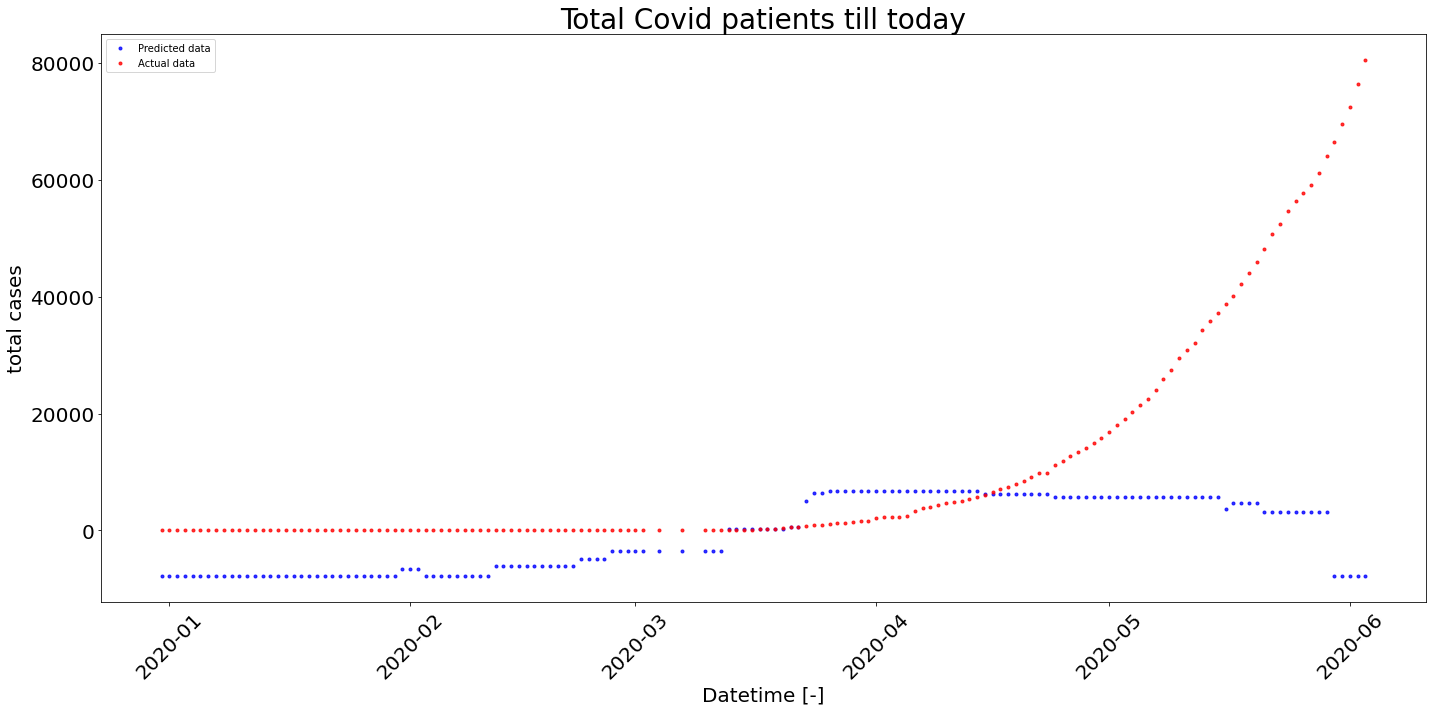

In [98]:
# Plotting the target: Total cases

plt.figure(figsize=(20,10))

plt.plot(pak_indices_dates, pak_y_pred, '.', color='blue', label='Predicted data', alpha=0.8)
plt.plot(pak_indices_dates, pak_y_test, '.', color='red', label='Actual data', alpha=0.8)
plt.legend()
plt.xlabel('Datetime [-]', fontsize=20)
plt.ylabel(r'total cases', fontsize=20)

plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)

plt.title('Total Covid patients till today', fontsize=28)

plt.tight_layout()


## Deep Neural Network

In [0]:
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam, SGD, Nadam
from tensorflow.keras import regularizers
from keras.optimizers import Adam

In [99]:
print((X_train.shape, y_train.shape))
print((X_test.shape, y_test.shape))

((15124, 38), (15124,))
((6482, 38), (6482,))


In [0]:
model = Sequential()
model.add(Dense(32, input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(0.01), use_bias=False))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.083))

model.add(Dense(512, kernel_regularizer=regularizers.l2(0.01), use_bias=False))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.156))   

model.add(Dense(256, kernel_regularizer=regularizers.l2(0.01), use_bias=False))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.156))   

model.add(Dense(32, kernel_regularizer=regularizers.l2(0.01), use_bias=False))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.156))   

model.add(Dense(1))


In [111]:
Adam = Adam(lr = 0.0001)
model.compile(optimizer = Adam, loss = 'mse', metrics = ['acc'])
hist = model.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_data = (X_test,y_test))

Train on 15124 samples, validate on 6482 samples
Epoch 1/100
15124/15124 [==============================] - 6s 384us/step - loss: 1072155464.3133 - acc: 0.0279 - val_loss: 155406637962.8729 - val_acc: 0.0000e+00
Epoch 2/100
15124/15124 [==============================] - 4s 236us/step - loss: 1072098312.6176 - acc: 0.0208 - val_loss: 155284770754.0059 - val_acc: 0.0000e+00
Epoch 3/100
15124/15124 [==============================] - 3s 231us/step - loss: 1072064952.6545 - acc: 0.0181 - val_loss: 154910591956.7233 - val_acc: 3.0855e-04
Epoch 4/100
15124/15124 [==============================] - 3s 230us/step - loss: 1072028189.9379 - acc: 0.0184 - val_loss: 155568004807.8763 - val_acc: 0.0000e+00
Epoch 5/100
15124/15124 [==============================] - 4s 232us/step - loss: 1071988025.3426 - acc: 0.0182 - val_loss: 154986968248.7425 - val_acc: 0.0000e+00
Epoch 6/100
15124/15124 [==============================] - 3s 230us/step - loss: 1071944376.2415 - acc: 0.0167 - val_loss: 154804887273.

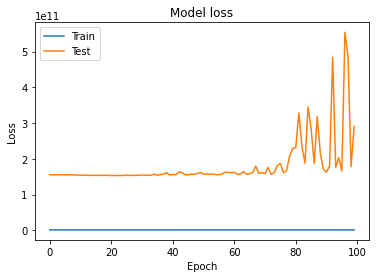

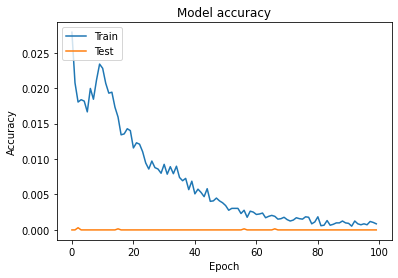

In [114]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
#Plot both the training accuracy as well as the validation accuracy on the same plot
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()